In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
df=pd.read_csv("/content/Seed_Data.csv")
x=df.iloc[:, :-1].values
y=df.iloc[:, :7].values
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [79]:
#no need to handle missing data and categorical as there is no in the dataset.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [80]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
X = df[['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG','target']]

In [81]:
#Hierarchical clustering
num_clusters = 3
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(X_scaled)


df['Cluster'] = clusters


print(df[['target', 'Cluster']])


silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

     target  Cluster
0         0        0
1         0        0
2         0        0
3         0        0
4         0        0
..      ...      ...
205       2        2
206       2        2
207       2        2
208       2        2
209       2        2

[210 rows x 2 columns]
Silhouette Score: 0.3926339709101015


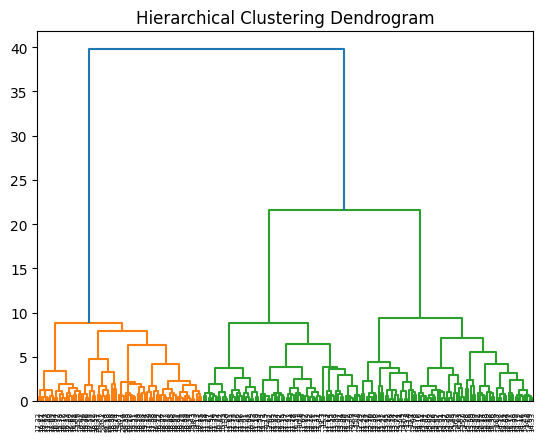

In [82]:
#Dendogram
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, labels=df.iloc[:, 0].tolist())
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

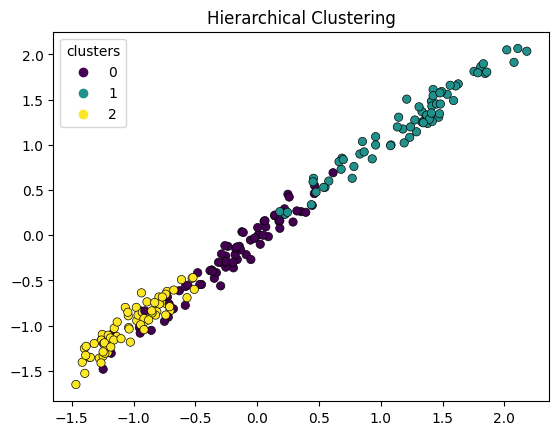

In [83]:
import seaborn as sns
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='viridis', edgecolor='k')
plt.title('Hierarchical Clustering')
plt.legend(title='clusters')
plt.show()

In [84]:
from sklearn.mixture import GaussianMixture
num_clusters_gmm = 3
model_gmm = GaussianMixture(n_components=num_clusters_gmm, random_state=42)
clusters_gmm = model_gmm.fit_predict(X_scaled)


df['Cluster_GMM'] = clusters_gmm


print(df[['target', 'Cluster_GMM']])


silhouette_avg_gmm = silhouette_score(X_scaled, clusters_gmm)
print(f"Silhouette Score (GMM): {silhouette_avg_gmm}")

     target  Cluster_GMM
0         0            2
1         0            2
2         0            2
3         0            2
4         0            2
..      ...          ...
205       2            1
206       2            1
207       2            1
208       2            1
209       2            1

[210 rows x 2 columns]
Silhouette Score (GMM): 0.36253844988591044


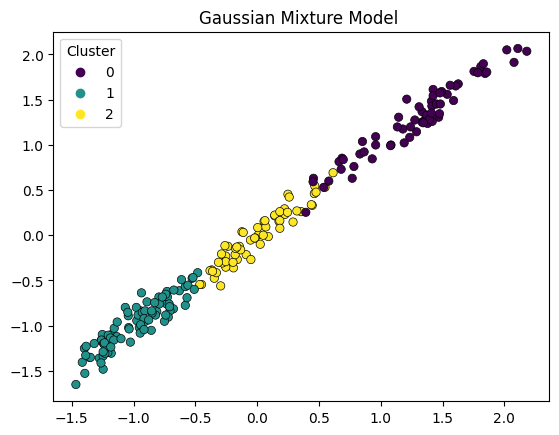

In [85]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters_gmm, palette='viridis', edgecolor='k')
plt.title('Gaussian Mixture Model ')
plt.legend(title='Cluster')